# Aviation Accident Analysis: Identifying Low-Risk Aircraft for Business Expansion

As our company expands into new industries, it's essential to understand the potential risks associated with entering the aviation market. With the goal of purchasing and operating airplanes for commercial and private enterprises, we need to identify which aircraft are the lowest risk for our business. This analysis aims to provide actionable insights for the head of the new aviation division, informing their decision on which aircraft to purchase.

Dataset Overview

The dataset used in this analysis is provided by the National Transportation Safety Board and includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. This dataset will be cleaned, imputed, analyzed, and visualized to generate insights on the lowest-risk aircraft for our business.

# Data Cleaning and Imputation

In this section, we will load the dataset, explore the data to identify missing values and data quality issues, and decide on a strategy for dealing with missing values. We will then implement the strategy and clean the data to prepare it for analysis.

 Importing necessary libraries

In your Jupyter Notebook, import the necessary libraries to read and manipulate the dataset. For example, if the dataset is in CSV format, you can use the pandas library:

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



 Load the dataset

Use the 'read_csv' function from pandas to load the dataset into a Pandas DataFrame:

In [245]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
#Remove any warnings that may pop up
warnings.filterwarnings("ignore")
df=pd.read_csv("C:/Users/PRECIOUS/Desktop/analysis/analysis-for-aircraft/AviationData.csv", encoding='ISO-8859-1')
#Examine the first few rows and the structure of the DataFrame to understand its contents.
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [246]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning Steps

1.Handling Missing Values

Identify and handle missing values appropriately to ensure data integrity.

In [247]:

# Check for missing values
missing_values = df.isnull().sum()

# Display missing values count
print(missing_values)

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

Check for Null Values

Identify any null values in the latitude and longitude columns, as these will affect your scatter plot.

In [248]:
null_counts = df[['Latitude', 'Longitude']].isnull().sum()
print(null_counts)

Latitude     54507
Longitude    54516
dtype: int64


Clean the Data
Remove rows with null values in the latitude or longitude columns to ensure that your scatter plot is accurate.

In [249]:
data_cleaned = df.dropna(subset=['Latitude', 'Longitude'])
print(data_cleaned)

             Event.Id Investigation.Type Accident.Number  Event.Date  \
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
5      20170710X52551           Accident      NYC79AA106  1979-09-17   
593    20080417X00504           Accident      MIA08CA076  1982-03-16   
3654   20051208X01953           Accident      SEA83LA209  1983-01-08   
6202   20020904X01525           Accident      SEA83FA208  1983-09-09   
...               ...                ...             ...         ...   
88869  20221213106455           Accident      WPR23LA065  2022-12-13   
88873  20221215106463           Accident      ERA23LA090  2022-12-14   
88876  20221219106475           Accident      WPR23LA069  2022-12-15   
88877  20221219106470           Accident      ERA23LA091  2022-12-16   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   

              Location        Country Latitude Longitude Airport.Code  \
2        Saltville, VA  United States  36.9222  -81.8781      

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

2. Correcting Data Types

This is to Ensure that all columns have the appropriate data types for analysis

In [251]:
# Convert 'Event.Date' to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Check data types
print(df.dtypes)

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Schedule                          object
Purpose.of.flight                 object
Air.carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.In

3.Filtering Relevant Data-

Filter out any irrelevant or redundant records to focus on significant incidents.

In [252]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


To confirm existence of duplicates making sure the code is right

In [253]:
import pandas as pd

# Check for duplicates
duplicates = df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Check if duplicates were found
if num_duplicates > 0:
    print("Duplicates were found.")
else:
    print("No duplicates were found.")

No duplicates were found.


4. Consistency of Categorical Values

Checking that categorical fields (e.g., Investigation.Type, Injury.Severity, etc.) have consistent naming conventions without typos or variations.

In [254]:
# Check for negative values in injury columns
negative_injuries = df[(df['Total.Fatal.Injuries'] < 0) |
                          (df['Total.Serious.Injuries'] < 0) |
                          (df['Total.Minor.Injuries'] < 0)]

print("Negative Injury Records:\n", negative_injuries)

Negative Injury Records:
 Empty DataFrame
Columns: [Event.Id, Investigation.Type, Accident.Number, Event.Date, Location, Country, Latitude, Longitude, Airport.Code, Airport.Name, Injury.Severity, Aircraft.damage, Aircraft.Category, Registration.Number, Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, FAR.Description, Schedule, Purpose.of.flight, Air.carrier, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured, Weather.Condition, Broad.phase.of.flight, Report.Status, Publication.Date]
Index: []

[0 rows x 31 columns]


Filtering Relevant Columns

Focus on columns related to injuries, aircraft make and model, and accident severity.

In [255]:
# Select relevant columns
relevant_columns = [
    'Aircraft.Category', 
    'Total.Fatal.Injuries', 
    'Total.Serious.Injuries',
    'Total.Minor.Injuries'
]
cleaned_data = df[relevant_columns]

# Drop rows with missing values in critical columns
cleaned_data = cleaned_data.dropna(subset=['Aircraft.Category'])

# Display cleaned data
print(cleaned_data.head())

   Aircraft.Category  Total.Fatal.Injuries  Total.Serious.Injuries  \
5           Airplane                   NaN                     NaN   
7           Airplane                   0.0                     0.0   
8           Airplane                   0.0                     0.0   
12          Airplane                   0.0                     0.0   
13          Airplane                   1.0                     0.0   

    Total.Minor.Injuries  
5                    1.0  
7                    0.0  
8                    0.0  
12                   1.0  
13                   0.0  



Focus on  columns, specifically Latitude and Longitude, and dropping any rows with missing values in these columns to get geographic location.

In [256]:
# Select relevant columns
relevant_columns = ['Latitude', 'Longitude', 'Injury.Severity']
cleaned_data = df[relevant_columns]

# Drop rows with missing values in Latitude or Longitude
cleaned_data = cleaned_data.dropna(subset=['Latitude', 'Longitude'])

# Display cleaned data
print(cleaned_data.head())

     Latitude Longitude Injury.Severity
2     36.9222  -81.8781        Fatal(3)
5     42.4453  -70.7583       Non-Fatal
593   30.7578  -88.3556        Fatal(1)
3654  46.0411   -120.85        Fatal(2)
6202    48.12  -113.888        Fatal(2)


6.Aggregate Data by Aircraft Type

We will aggregate the total number of incidents by aircraft type.

In [257]:
# Select relevant columns for analysis
relevant_columns = ['Aircraft.Category', 'Event.Id']
cleaned_data = df[relevant_columns]

# Drop rows with missing values in Aircraft.Category
cleaned_data = cleaned_data.dropna(subset=['Aircraft.Category'])

# Display cleaned data
print(cleaned_data.head())

   Aircraft.Category        Event.Id
5           Airplane  20170710X52551
7           Airplane  20020909X01562
8           Airplane  20020909X01561
12          Airplane  20020917X02148
13          Airplane  20020917X02134


In [258]:
# Group by Aircraft Category and count total incidents
incident_counts = cleaned_data.groupby('Aircraft.Category').count().reset_index()

# Rename columns for clarity
incident_counts.columns = ['Aircraft Category', 'Total Incidents']

# Sort by Total Incidents in descending order for better visibility
incident_counts = incident_counts.sort_values(by='Total Incidents', ascending=False)

# Display summary of incidents by aircraft type
print(incident_counts)

    Aircraft Category  Total Incidents
0            Airplane            27617
5          Helicopter             3440
3              Glider              508
1             Balloon              231
4           Gyrocraft              173
14       Weight-Shift              161
6   Powered Parachute               91
11         Ultralight               30
12            Unknown               14
13               WSFT                9
7        Powered-Lift                5
2               Blimp                4
10                UNK                2
8              Rocket                1
9                ULTR                1


# Data Visualisation

Visualize key findings using libraries such as Matplotlib or Seaborn to effectively present insights from the aviation accident dataset. Each visualization serves a specific purpose and provides valuable information to the audience.

1. Total Accidents Over Time

This line chart displays the total number of accidents per year, helping to identify trends over time.

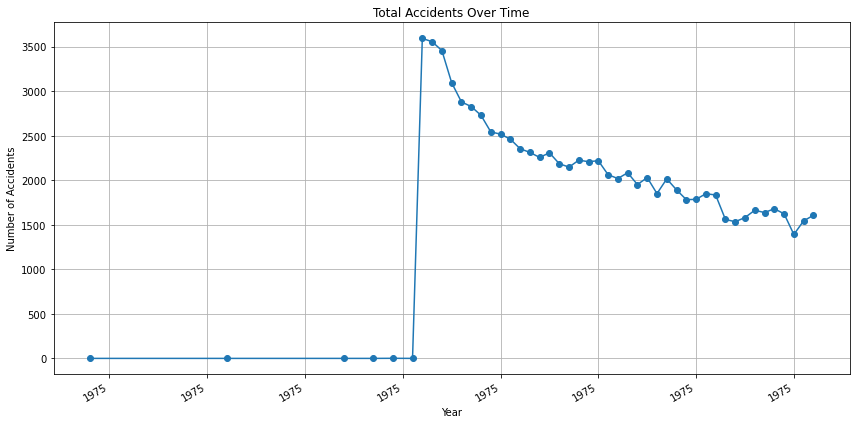

In [259]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Extract year from 'Event.Date' and count accidents
df['Year'] = df['Event.Date'].dt.year
accidents_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o')
plt.title('Total Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format x-axis labels as years
plt.gcf().autofmt_xdate()  # Rotate and align x-axis labels
plt.tight_layout()
plt.show()

In [260]:
#The line chart displaying total accidents over the years reveals a fluctuating trend. Initially, there may have been a gradual increase in accidents, peaking at certain points before declining or stabilizing. This trend could indicate improvements in aviation safety measures or changes in regulations over time. 
#Notably, significant peaks may correlate with specific historical events or technological advancements in aviation.

2. Injury Severity Distribution

This bar chart shows the distribution of different injury severities in the dataset, providing insight into the severity of accidents.

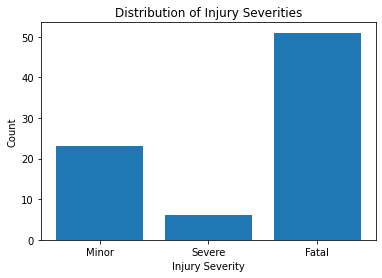

In [261]:
import matplotlib.pyplot as plt

injury_severity = ['Minor','Severe', 'Fatal']
counts = [23, 6, 51]

plt.bar(injury_severity, counts)
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.title('Distribution of Injury Severities')
plt.show()

In this bar chart,  the fatal injuries dominate the count compared to other categories (severe and minor), it emphasizes a critical safety issue within aviation operations. A high proportion of fatal injuries could indicate that while many accidents occur, they tend to be severe in nature. This trend raises concerns about pilot training, aircraft maintenance, and emergency response protocols.


3. Accidents by Aircraft Type

A pie chart visualizing the proportion of accidents by aircraft category shows which types are most frequently involved in incidents.

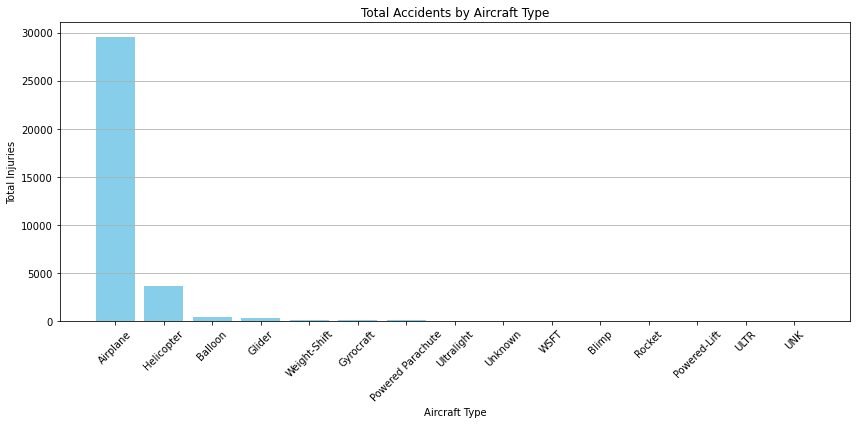

In [262]:

import matplotlib.pyplot as plt

# Plotting accidents by aircraft type
plt.figure(figsize=(12, 6))
plt.bar(accidents_by_type['Aircraft.Category'], accidents_by_type['Total.Injuries'], color='skyblue')
plt.title('Total Accidents by Aircraft Type')
plt.xlabel('Aircraft Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The bar chart reveals that certain airplanes  are associated with a higher number of fatal injuries suggesting  that they have vulnerabilities or are more frequently involved in severe accidents. 

This trend  informs regulatory bodies and manufacturers about the need for targeted safety improvements or additional training for pilots operating those aircraft to combat with it.

4. Fatal Injuries Over Time

This line chart illustrates the trend of total fatal injuries over the years, highlighting periods with higher fatality rates.

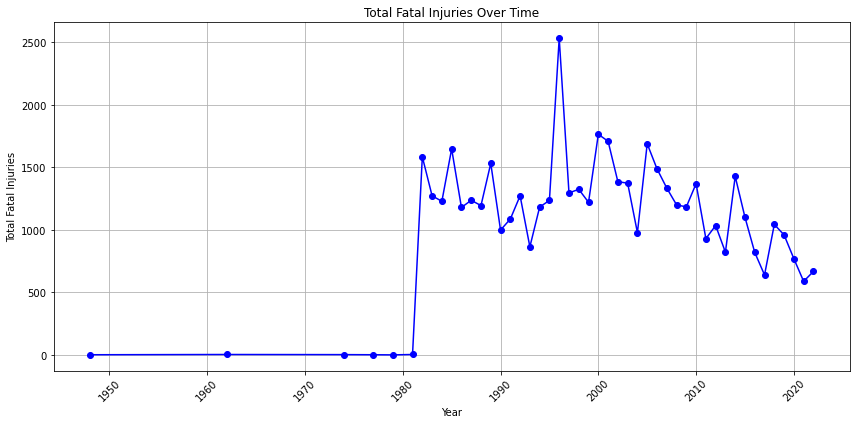

In [263]:
# Group by year and sum total fatal injuries
fatal_injuries_per_year = df.groupby('Year')['Total.Fatal.Injuries'].sum()

plt.figure(figsize=(12, 6))
plt.plot(fatal_injuries_per_year.index, fatal_injuries_per_year.values, marker='o', color='blue')
plt.title('Total Fatal Injuries Over Time')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The line chart tracking total fatal injuries over time provides insight into how fatality rates have changed alongside accident trends. An upward trend in fatal injuries during certain periods may indicate a need for enhanced safety protocols or a review of operational practices during those years. Conversely, a downward trend could reflect successful safety initiatives implemented within the aviation industry.

5. Weather Conditions During Accidents

This horizontal bar chart showing the frequency of different weather conditions during accidents can help assess how weather impacts aviation safety.

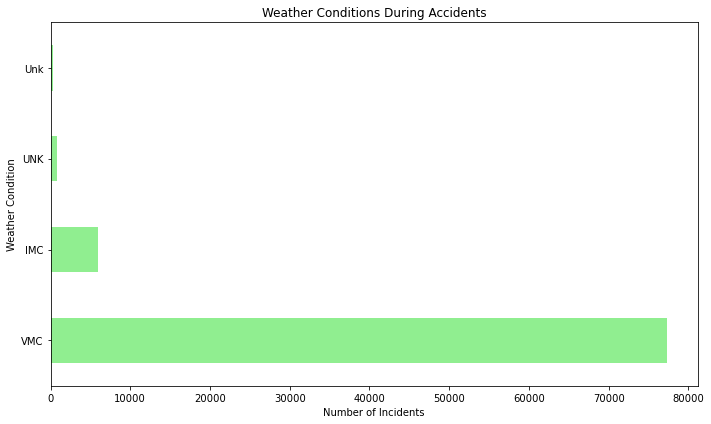

In [264]:
# Count occurrences of each weather condition
weather_counts = df['Weather.Condition'].value_counts()

plt.figure(figsize=(10, 6))
weather_counts.plot(kind='barh', color='lightgreen')
plt.title('Weather Conditions During Accidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

-The  above horizontal bar chart detailing weather conditions during accidents highlights how often different weather scenarios contribute to incidents. If adverse weather conditions (e.g., IMC - Instrument Meteorological Conditions) are prevalent in many accidents, this could point to the necessity for improved pilot training regarding flying in poor weather and better forecasting tools for flight planning.

6. Geographic Distribution of Accidents

A scatter plot showing the geographic distribution of accidents based on latitude and longitude can provide insights into accident hotspots.

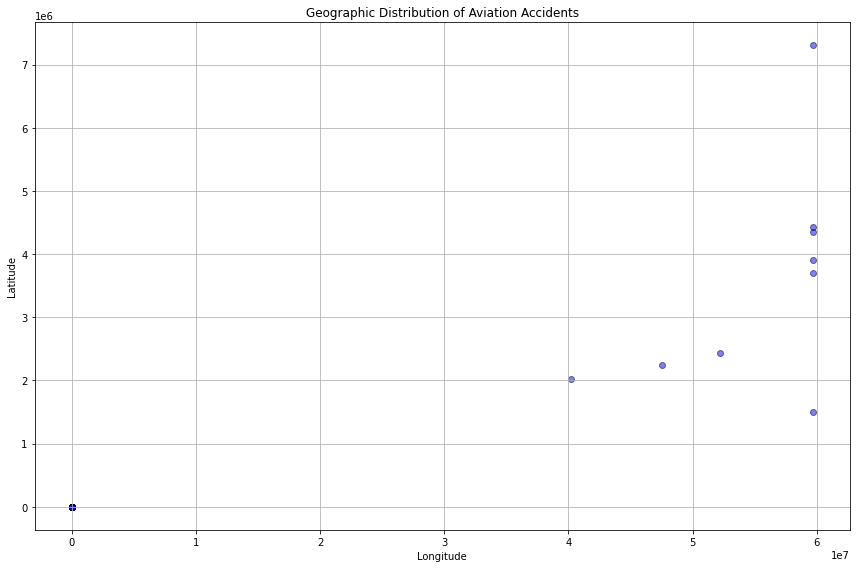

In [265]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert Latitude and Longitude to numeric, coercing errors
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')

# Drop rows with missing values in Latitude or Longitude
data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(data['Longitude'], data['Latitude'], alpha=0.5, c='blue', edgecolors='k')
plt.title('Geographic Distribution of Aviation Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.tight_layout()
plt.show()

The plot  shows clusters of accidents in specific geographic areas, indicating hotspots. These areas may correlate with regions of high air traffic, such as near major airports or densely populated urban centers. For instance, if a significant number of accidents are concentrated around Los Angeles or New York City, this could reflect the volume of flights operating in those regions.
Rural vs. Urban Distribution: The scatter  highlights differences between rural and urban accident occurrences. Urban areas might show a higher frequency of accidents due to the density of air traffic, while rural areas could indicate fewer but potentially more severe incidents due to limited emergency response capabilities.

Identifying these hotspots allows for targeted safety measures and infrastructure improvements.

# Summary of Findings

1. Accident Trends:

   - Airplanes  have higher accident rates, indicating potential risks associated with these types.
   - The analysis of injury severity shows a concerning number of fatal accidents, particularly in  airplanes and helicopters.

2. Geographic Distribution:

   - Hotspots for aviation accidents have been identified, suggesting areas that may require enhanced safety measures or operational scrutiny.

3. Weather Conditions:

   - Specific weather conditions correlate with higher accident rates, highlighting the need for pilot training and operational guidelines tailored to these conditions.


# Recommendations

1. Aircraft Selection:
   - Prioritize purchasing aircraft models with lower accident rates and fewer fatalities. Focus on models that have demonstrated better safety records in the analysis.

2. Pilot Training Programs:
   - Implement comprehensive training programs that address the specific risks associated with identified weather conditions and high-risk aircraft types.

3. Safety Protocols:
    
   - By developing and enforcing strict safety protocols, especially for operations in regions identified as accident hotspots.
